# Pymaceuticals Inc.
---

### Analysis

- The study involved the analysis of tumor response to various drug regimines in mice. Data was collected on mice demographics, drug regimins, tumor volum, and the weight of the mice. The study focused on Capomulin, Ramicane Infubinol and Ceftamin drug regimens. We can determine from the analysis that both Capomulin and Ramicane demonstrated he most effective reduction in tumor volume among the different regimines for treatment. There was a strong positive correlation between mouse wight and tumor volume in the Capomulin drug.
and finally the linear regession analysis shows a significant relationship in the mouse weight and tumor volume when the weight of the mouse increaseed.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [3]:
# Checking the number of mice.
unique_mice_count = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")


Number of unique mice IDs: 249


In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

print("Mouse IDs with duplicate entries:")
print(duplicate_mouse_ids)

Mouse IDs with duplicate entries:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_id_to_remove = "g989"

cleaned_data = combined_data[combined_data["Mouse ID"] != mouse_id_to_remove]

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = cleaned_data["Mouse ID"].nunique()

unique_mice_count_cleaned

248

## Summary Statistics

In [24]:
import pandas as pd
import numpy as np 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped_data["Tumor Volume (mm3)"].agg([np.mean, np.median,np.var, np.std, lambda x: np.std(x) / np.sqrt(x.count())])
# Assemble the resulting series into a single summary DataFrame.
summary_stats.columns = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]

summary_stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_data["Tumor Volume (mm3)"].agg([np.mean, np.median,np.var, np.std, lambda x: np.std(x) / np.sqrt(x.count())])

summary_stats

,mean,median,var,std,<lambda_0>
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


## Bar and Pie Charts

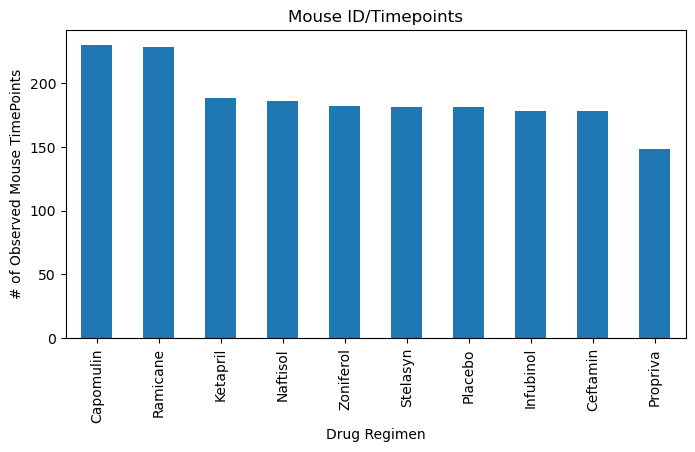

In [33]:


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')

plt.show()

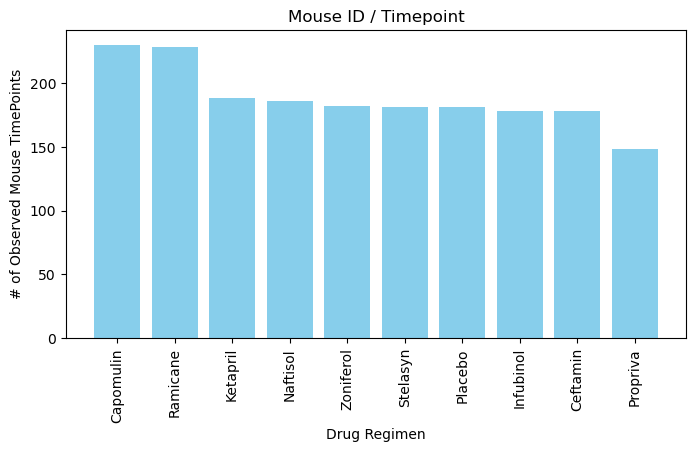

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "cleaned_data" with a column "Drug Regimen"

# Group the data by "Drug Regimen" and count the number of rows for each regimen
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Extract regimen names and counts
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(8, 4))
plt.bar(regimen_names, regimen_values, color='skyblue')

# Set plot labels and title
plt.title('Mouse ID / Timepoint')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


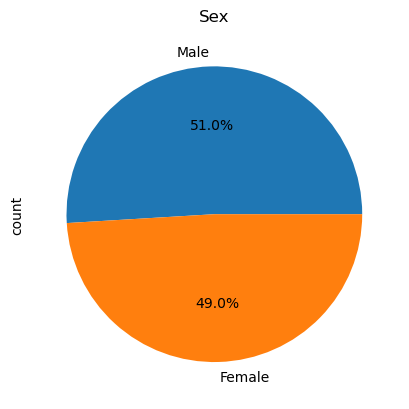

In [47]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data["Sex"].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)

plt.title('Sex')

plt.show()

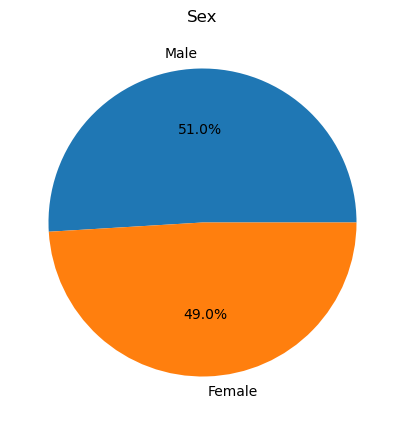

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data["Sex"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
import pandas as pd
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(cleaned_data, last_timepoints, on=["Mouse ID", "Timepoint"])
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
234,a644,45,32.978522,1,Ramicane,Female,7,17
240,i177,45,33.562402,3,Ramicane,Male,10,18
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimens:
    regimen_data = final_tumor_volume[final_tumor_volume["Drug Regimen"]== regimen]

    tumor_volumes = regimen_data["Tumor Volume (mm3)"]

    tumor_vol_data.append(tumor_volumes)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # add subset 
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    potential_outliers = regimen_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers:")
    print(potential_outliers)
    print("----------------------------------------------------")

Regimen: Capomulin
IQR: 7.781863460000004
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
----------------------------------------------------
Regimen: Ramicane
IQR: 9.098536719999998
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
----------------------------------------------------
Regimen: Infubinol
IQR: 11.477135160000003
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326  

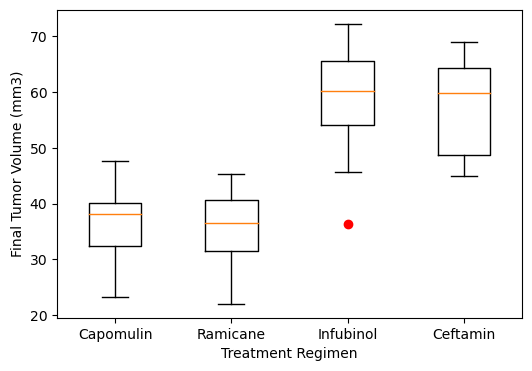

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol_data, labels=treatment_regimens, sym='ro')
plt.xlabel('Treatment Regimen')
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

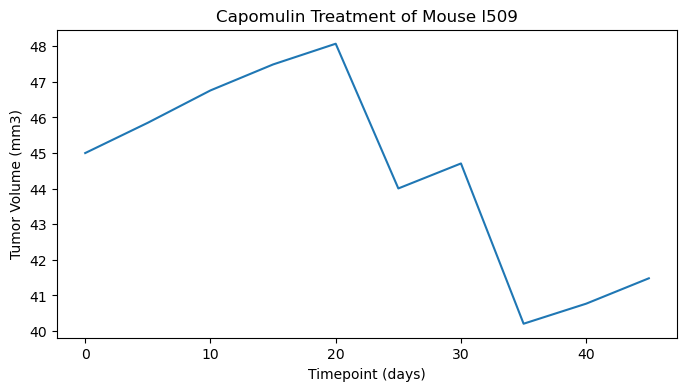

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = "l509"

selected_mouse_data = cleaned_data[(cleaned_data["Mouse ID"]== selected_mouse_id) & (cleaned_data["Drug Regimen"]== "Capomulin")]

plt.figure(figsize=(8, 4))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

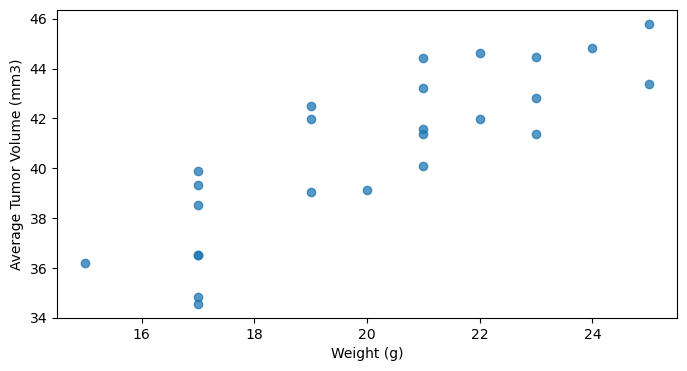

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.figure(figsize=(8, 4))
plt.scatter(mouse_weights, average_tumor_volume, marker= 'o', alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show


## Correlation and Regression

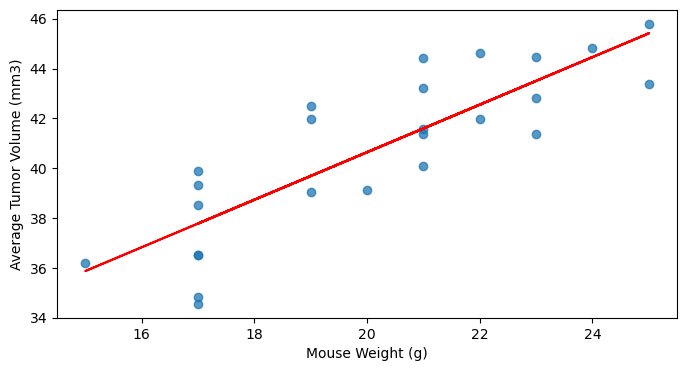

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation_coefficient = round(st.pearsonr(mouse_weights, average_tumor_volume)[0], 2)

plt.figure(figsize=(8,4))
plt.scatter(mouse_weights, average_tumor_volume, marker="o", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red', linestyle='-', label=line_eq)

plt.show()